In [1]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [2]:
# it appears that the Noe model is on the trajectory 0 ONLY
# let's do both full dataset and just that trajectory

In [3]:
traj_files1 = sorted(glob('/Volumes/DATA/MSM_Zuckerman/NTL9_featurized/featurized_resmindist/NTL9-0*.npy'))
traj_files2 = sorted(glob('/Volumes/DATA/MSM_Zuckerman/NTL9_featurized/featurized_resmindist/NTL9-2*.npy'))
traj_files3 = sorted(glob('/Volumes/DATA/MSM_Zuckerman/NTL9_featurized/featurized_resmindist/NTL9-3*.npy'))

In [4]:
# all trajectories

In [5]:
source = pyemma.coordinates.source([traj_files1, traj_files2, traj_files3], chunk_size=10000)

<ipython-input-5-ab7118b762f8>:1: PyEMMA_DeprecationWarning: Passed deprecated argument "chunk_size", please use "chunksize"
  source = pyemma.coordinates.source([traj_files1, traj_files2, traj_files3], chunk_size=10000)


In [6]:
# top model is commute, tica lag 50 frames, 50 tics, 100 microstates, msm lag 50 frames

In [14]:
tica = pyemma.coordinates.tica(source, lag=50, dim=50, kinetic_map=False, commute_map=True)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=95), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [15]:
Y = tica.get_output()

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=95), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [16]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=100, max_iter=1000)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

26-06-18 16:31:38 pyemma.coordinates.clustering.kmeans.KmeansClustering[9] INFO     Cluster centers converged after 3 steps.


In [17]:
dtrajs = kmeans.dtrajs

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [18]:
np.save('dtrajs_ntl9_lag10ns', dtrajs)

In [2]:
dtrajs = list(np.load('dtrajs_ntl9_lag10ns.npy'))

In [4]:
# its = pyemma.msm.its(dtrajs, 5000)

In [5]:
# plt.figure(dpi=300)
# pyemma.plots.plot_implied_timescales(its, ylog=False, dt=0.2, units='ns')
# plt.axvline(10, c='red')
# plt.title('NTL9 - tICA: commute, lag 50 ns, dims 50, micros.: 100')
# #plt.xticks([10,50,100,150,200,250,300,350,400])
# plt.tight_layout()
# plt.savefig('ntl9_its.png', dpi=300)
# plt.savefig('ntl9_its.pdf')

In [6]:
# #bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 50)
# msm = pyemma.msm.estimate_markov_model(dtrajs, 50)

In [7]:
# #ck_test = bmsm.cktest(2, err_est=True)
# ck_test = msm.cktest(2)

In [8]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('ntl9_cktest.png', dpi=300)
# plt.savefig('ntl9_cktest.pdf')

In [9]:
# ck_test_3 = msm.cktest(3)

In [10]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test_3, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('ntl9_cktest_3macro.png', dpi=300)
# plt.savefig('ntl9_cktest_3macro.pdf')

In [29]:
# use 300 ns too as Noe model does

In [11]:
# #bmsm_ = pyemma.msm.bayesian_markov_model(dtrajs, 1500)
# msm_ = pyemma.msm.estimate_markov_model(dtrajs, 1500)

In [12]:
# ck_test_ = msm_.cktest(2)

In [13]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test_, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('ntl9_cktest_lag300ns.png', dpi=300)
# plt.savefig('ntl9_cktest_lag300ns.pdf')

In [11]:
# UPDATE: a) all CK plots should go out to the same maximum for comparison, b) let's look at 10ns, 100 ns and then every
# 100 ns until the lag time used in the Noe models

In [ ]:
# lag 10 ns

In [12]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 50)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [13]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (300/10)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

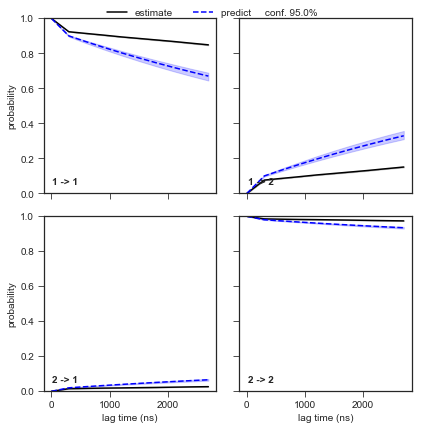

In [14]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag10ns_outto2700ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag10ns_outto2700ns.pdf')

In [15]:
# lag 100 ns

In [16]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 500)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [17]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (300/100)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

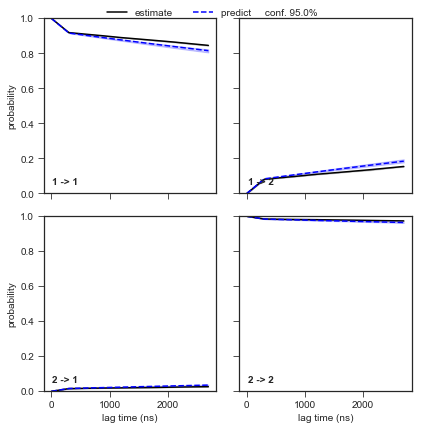

In [18]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag100ns_outto2700ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag100ns_outto2700ns.pdf')

In [19]:
# lag 200 ns

In [20]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 1000)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [21]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (300/200)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

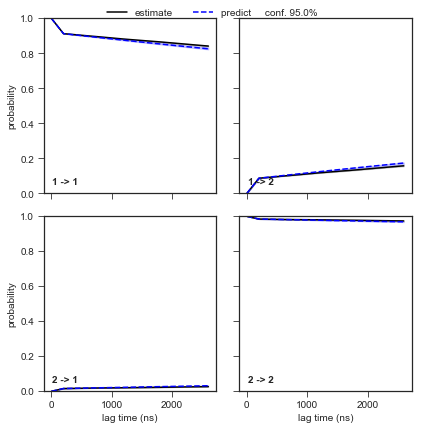

In [22]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag200ns_outto2700ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag200ns_outto2700ns.pdf')

In [23]:
# lag 300 ns

In [27]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 1500)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [28]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (300/300)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

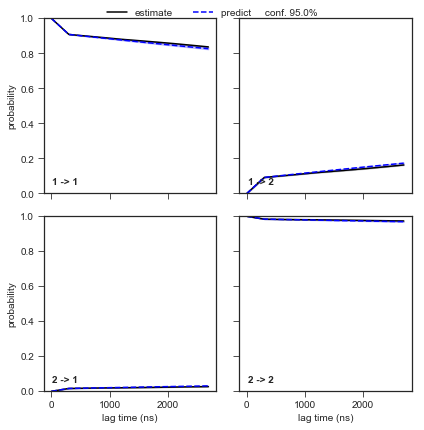

In [29]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag300ns_outto2700ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag300ns_outto2700ns.pdf')

In [17]:
# bayesian ITS

In [35]:
# its = pyemma.msm.its(dtrajs, 5000, errors='bayes', n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=23), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [ ]:
its = pyemma.msm.its(dtrajs, 10000, errors='bayes', n_jobs=8)

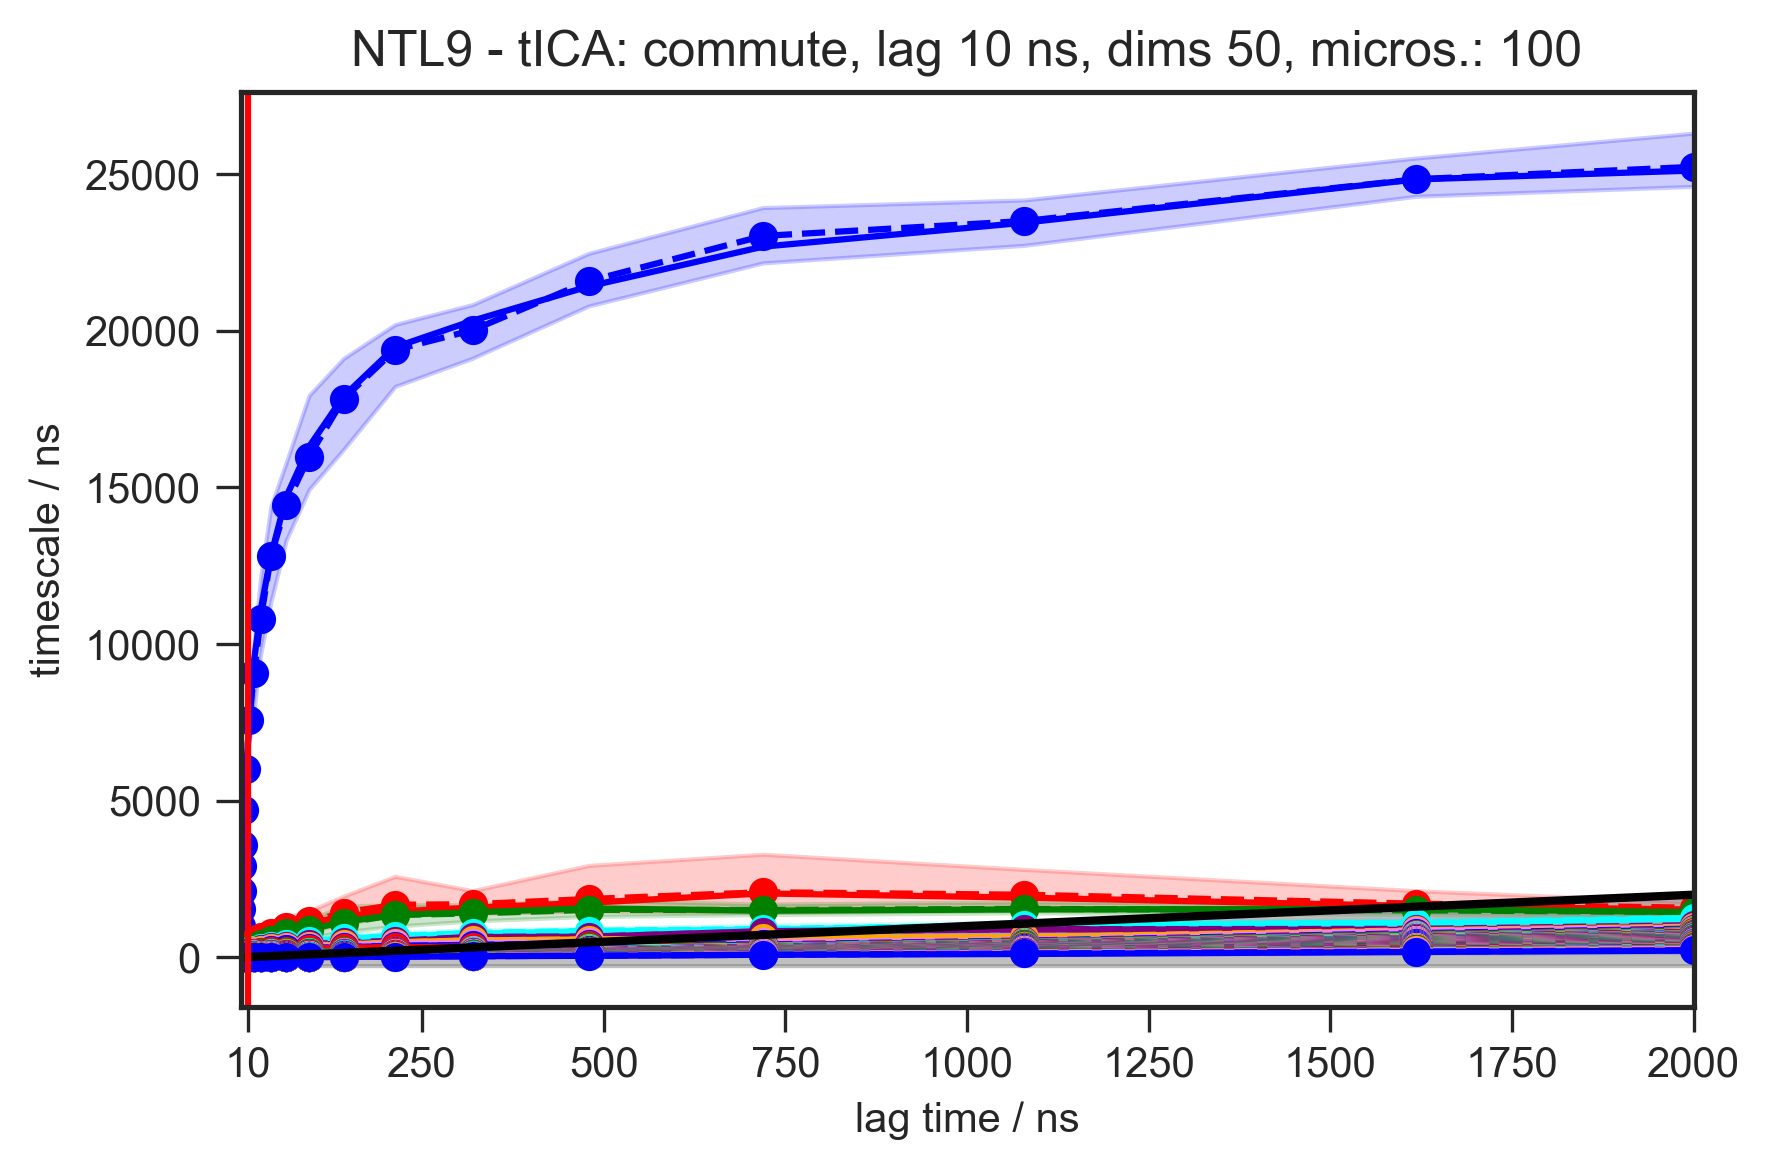

In [28]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=False, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('NTL9 - tICA: commute, lag 10 ns, dims 50, micros.: 100')
plt.xticks([10,250,500,750,1000,1250,1500,1750,2000])
plt.tight_layout()
plt.savefig('ntl9_its.png', dpi=300)
plt.savefig('ntl9_its.pdf')

In [21]:
# plt.figure(dpi=300)
# pyemma.plots.plot_implied_timescales(its, ylog=False, dt=0.2, units='ns')
# plt.axvline(10, c='red')
# plt.title('NTL9 - tICA: commute, lag 10 ns, dims 50, micros.: 100')
# plt.xticks([10,250,500,750,1000,1250,1500,1750,2000])
# plt.tight_layout()
# plt.savefig('ntl9_its_2us.png', dpi=300)
# plt.savefig('ntl9_its_2us.pdf')

In [6]:
# 2 eigenvalue model

In [7]:
# top model is commute, tica lag 50 frames, 2 tics, 600 microstates

In [9]:
tica = pyemma.coordinates.tica(source, lag=50, dim=2, kinetic_map=False, commute_map=True)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=95), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [10]:
Y = tica.get_output()

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=95), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [11]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=600, max_iter=1000)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=600), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

26-06-18 15:37:40 pyemma.coordinates.clustering.kmeans.KmeansClustering[5] INFO     Cluster centers converged after 3 steps.


In [12]:
dtrajs = kmeans.dtrajs

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=3), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [13]:
np.save('dtrajs_ntl9_lag10ns_2eigen', dtrajs)

In [29]:
dtrajs = list(np.load('dtrajs_ntl9_lag10ns_2eigen.npy'))

In [30]:
its_2eigen = pyemma.msm.its(dtrajs, 10000, n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=23), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

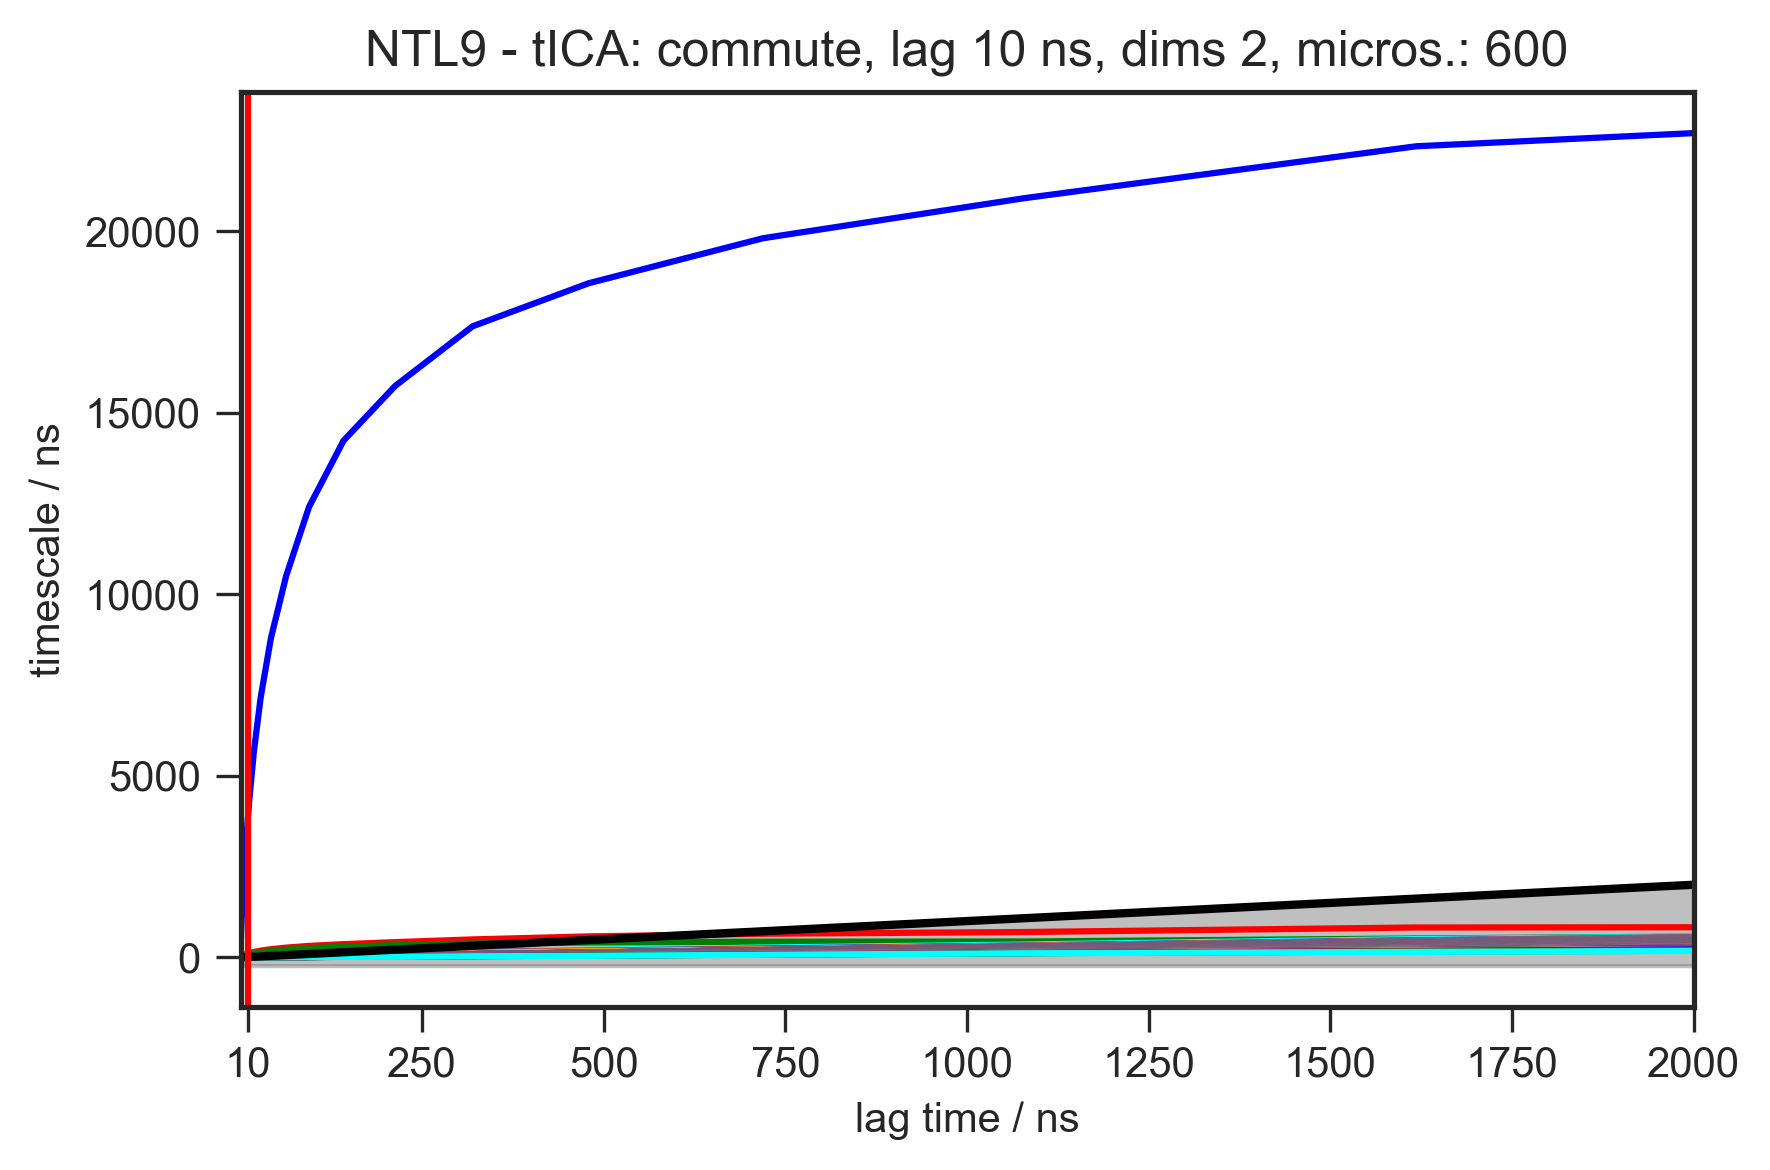

In [31]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its_2eigen, ylog=False, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('NTL9 - tICA: commute, lag 10 ns, dims 2, micros.: 600')
plt.xticks([10,250,500,750,1000,1250,1500,1750,2000])
plt.tight_layout()
plt.savefig('ntl9_its_2eigen.png', dpi=300)
plt.savefig('ntl9_its_2eigen.pdf')

In [32]:
import numpy as _np
from pyemma.util.types import  is_iterable_of_int as _is_iterable_of_int, is_int as _is_int

def plot_implied_timescales(ITS, ax=None, outfile=None, show_mle=True, show_mean=True,
                            xlog=False, ylog=True, confidence=0.95, refs=None, nits=-1,
                            process=None, units='steps', dt=1., colors = ['blue'], **kwargs):
    r"""Implied timescale plot
    Parameters
    ----------
    ITS : implied timescales object.
        Object whose data will be plotted. Must provide the functions: get_timescales() and get_timescales(i) where i is the
        the property samples_available
    ax : matplotlib Axes object, optional, default = None
        the axes to plot to. When set to None the default Axes object will be used.
    outfile : str, optional, default = None
        output file to write the figure to. When not given, the plot will be displayed
    show_mean : bool, default = True
        Line for mean value will be shown, if available
    show_mle : bool, default = True
        Line for maximum likelihood estimate will be shown
    xlog : bool, optional, default = False
        Iff true, the x-Axis is logarithmized
    ylog : bool, optional, default = True
        Iff true, the y-Axis is logarithmized
    confidence : float, optional, default = 0.95
        The confidence interval for plotting error bars (if available)
    refs : ndarray((m), dtype=float), optional, default = None
        Reference (exact solution or other reference) timescales if known. The number of timescales must match those
        in the ITS object
    nits: integer, default = -1
        Number of implied timescales to be shown. The default behaviour (-1) is to show all timescales available.
        :py:obj:`nits` != -1 and :py:obj:`process` != None are mutually exclusive
    process : iterable of integers, default is None
        list or ndarray((m), dtype=int) containing a list of the processes to be shown. The default behaviour is
        to show all timescales available.
        :py:obj:`process` != None and :py:obj:`nits` != -1 are mutually exclusive
    units: str or list (len=2) of strings, optional, default = 'steps'
        Affects the labeling of the axes. Used with :py:obj:`dt`, allows for changing the physical units of the axes.
        Accepts simple LaTeX math strings, eg. '$\mu$s'
        If this parameter is a list, it will be assumed that units[0] is for the x-axis and units[1] for the y-axis.
    dt: float or list(len=2) of floats, optional, default = 1.0
        Physical time between frames, expressed the units given in :py:obj:`units`. E.g, if you know that each
        frame corresponds to .010 ns, you can use the combination of parameters :py:obj:`dt` =0.01,
        :py:obj:`units` ='ns' to display the implied timescales in ns (instead of frames)
        If this parameter is a list, it will be assumed that dt[0] is for the x-axis and dt[1] for the y-axis.
    **kwargs: Will be passed to pyplot.plot when plotting the MLE datapoints (not the bootstrapped means).
            See the doc of pyplot for more options. Most useful lineproperties like `marker='o'` and/or :markersize=5
    Returns
    -------
    ax : Axes object containing the plot
    """
    import matplotlib.pyplot as _plt
    # check input
    if ax is None:
        ax = _plt.gca()
    #colors = ['blue', 'red', 'green', 'cyan', 'purple', 'orange', 'violet']
    lags = ITS.lagtimes
    xmax = _np.max(lags)
    srt = _np.argsort(lags)
    # Check the processes to be shown
    if process is not None:
        if nits != -1:
            raise TypeError(
                'optional arguments nits and process are mutually exclusive:', nits, process)
        if not _is_iterable_of_int(process):
            raise ValueError('process has to be an iterable of integers')
        if _np.max(process)+1 > ITS.number_of_timescales:
            raise ValueError(
                'requested process %u, whereas ITS only contains %u timescales' % (
                    _np.max(process), ITS.number_of_timescales))
        # Now that it's for sure that nits==-1, process is iter_of_ints, and the requested processes exist in its object:
        its_idx = process
    else:
        if not _is_int(nits):
            raise TypeError('nits is not an integer, ',nits)
        if nits == -1:
            nits = ITS.number_of_timescales
        its_idx = _np.arange(ITS.number_of_timescales)[:nits]
    # Check units and dt for user error.
    if isinstance(units, list) and len(units) != 2:
        raise TypeError("If units is a list, len(units) has to be = 2")
    if isinstance(dt, list) and len(dt) != 2:
        raise TypeError("If dt is a list, len(dt) has to be = 2")
    # Create list of units and dts for different axis
    if isinstance(units, str):
        units = [units] * 2
    if isinstance(dt, (float, int)):
        dt = [dt] * 2
    #ymin = min(_np.min(lags), _np.min(ITS.get_timescales()))
    #ymax = 1.5*_np.min(ITS.get_timescales())
    for i in its_idx:
        # plot estimate
        if show_mle:
            ax.plot(
                lags[srt] * dt[0], ITS.get_timescales(process=i)[srt] * dt[1],
                color=colors[i % len(colors)], **kwargs)
        # sample available?
        if ITS.samples_available:# and ITS.sample_number_of_timescales > i):
            # plot sample mean
            if show_mean:
                ax.plot(
                    lags[srt] * dt[0], ITS.get_sample_mean(process=i)[srt] * dt[1], marker='o',
                    color=colors[i % len(colors)], linestyle='dashed')
            (lconf, rconf) = ITS.get_sample_conf(confidence, i)
            ax.fill_between(
                lags[srt] * dt[0], lconf[srt] * dt[1], rconf[srt] * dt[1],
                alpha=0.2, color=colors[i % len(colors)])
        # reference available?
        if refs is not None:
            tref = refs[i] * dt[1]
            ax.plot([0, min(tref, xmax) * dt[0]], [tref, tref], color='black', linewidth=1)
    # cutoff
    ax.plot(lags[srt] * dt[0], lags[srt] * dt[1], linewidth=2, color='black')
    ax.set_xlim([1.0 * dt[0], xmax * dt[0]])
    #ax.set_ylim([ymin,ymax])
    ax.fill_between(
        lags[srt] * dt[0], ax.get_ylim()[0]*_np.ones(len(lags))*dt[1], lags[srt] * dt[1],
        alpha=0.5, color='grey')
    # formatting
    ax.set_xlabel('lag time / %s' % units[0])
    ax.set_ylabel('timescale / %s' % units[1])
    if (xlog):
        ax.set_xscale('log')
    if (ylog):
        ax.set_yscale('log')
    # show or save
    # if outfile is None:
    #    _plt.show()
    if outfile is not None:
        _plt.savefig(outfile)
    return ax

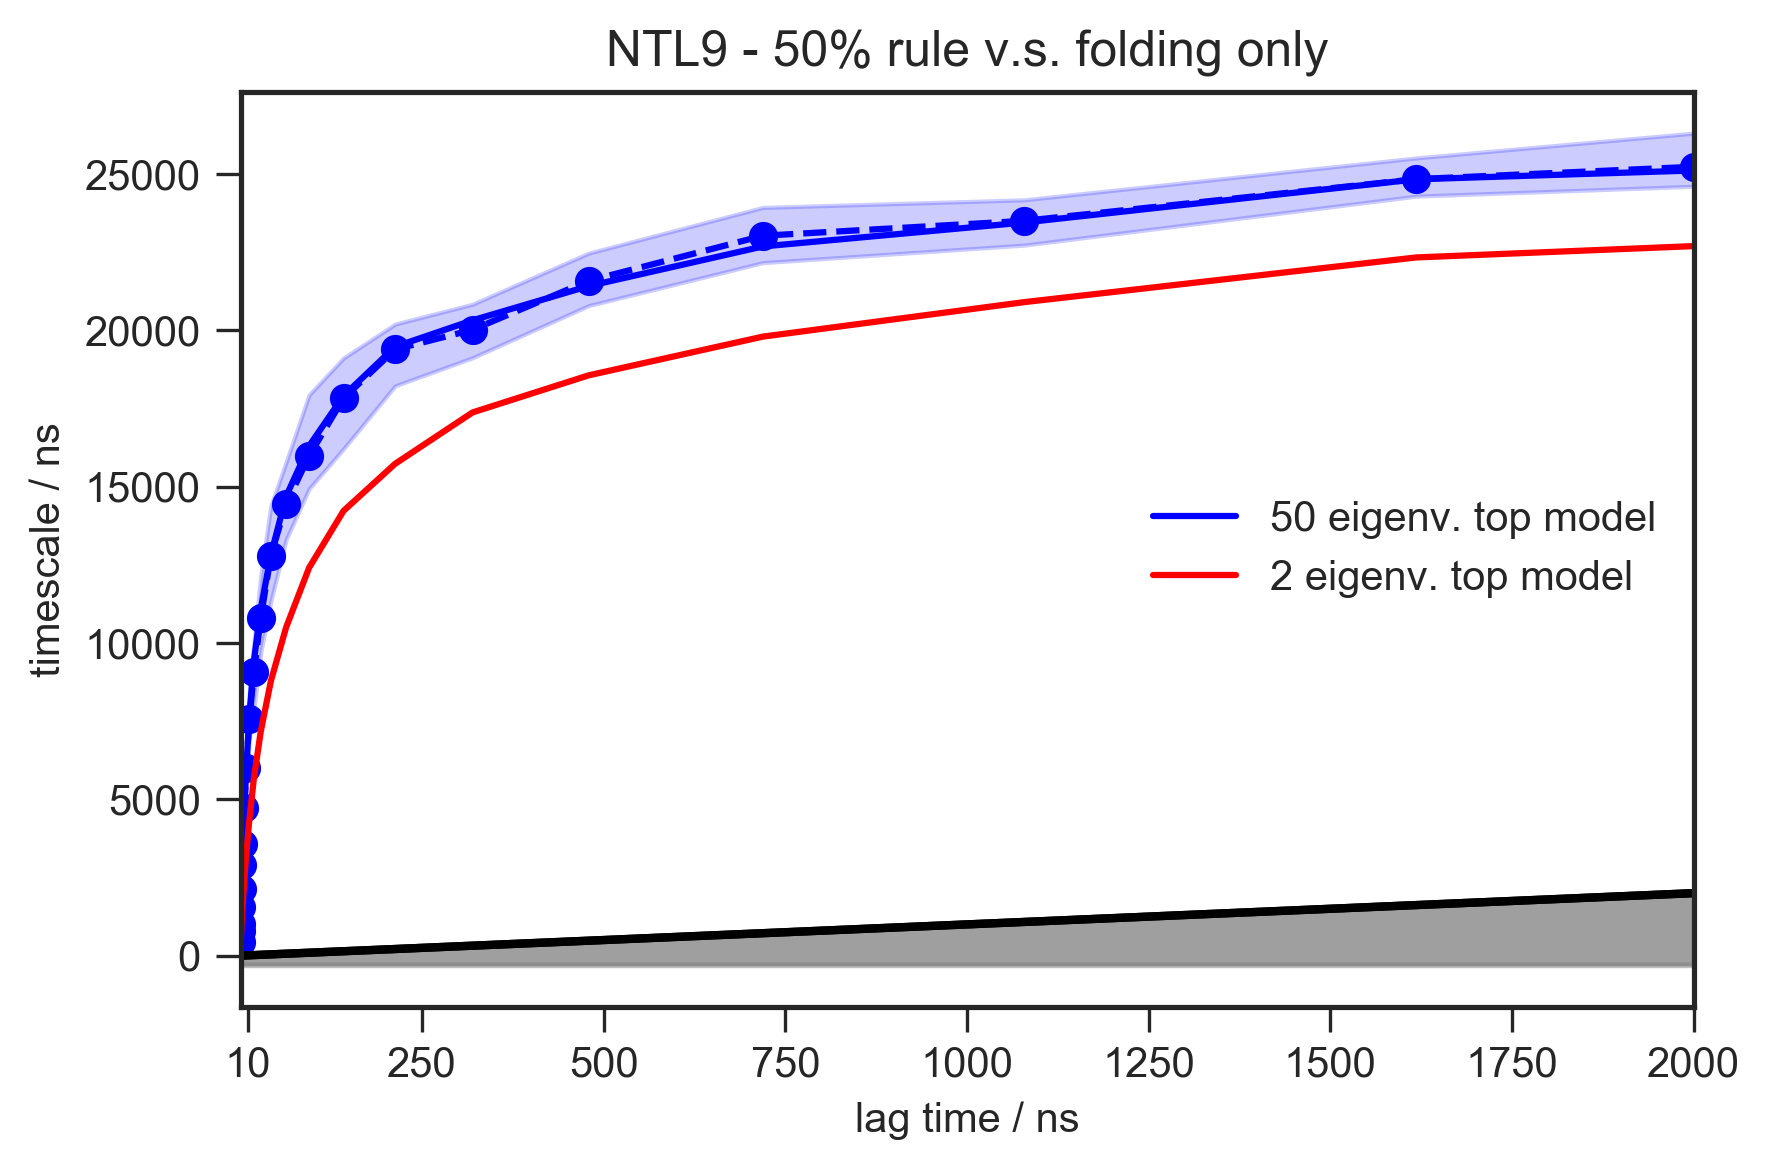

In [33]:
plt.figure(dpi=300)
plot_implied_timescales(its, ylog=False, dt=0.2, units='ns', nits=1, show_mean=True, label='50 eigenv. top model')
plot_implied_timescales(its_2eigen, ylog=False, dt=0.2, units='ns', nits=1, colors=['red'], show_mean=True, label='2 eigenv. top model')
plt.legend(loc='center right')
#plt.axvline(10, c='red')
plt.title('NTL9 - 50% rule v.s. folding only')
plt.xticks([10,250,500,750,1000,1250,1500,1750,2000])
plt.tight_layout()
plt.savefig('ntl9_its_lag10ns_diffeigen.png', dpi=300)
plt.savefig('ntl9_its_lag10ns_diffeigen.pdf')

In [34]:
# 2 eigen CK-test

In [35]:
# lag 10 ns

In [37]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 50)

In [38]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (300/10)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

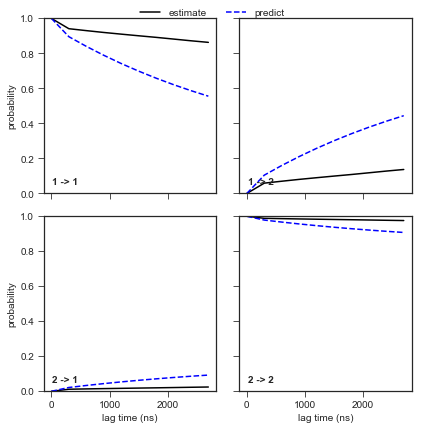

In [39]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag10ns_outto2700ns_2eigen.png', dpi=300)
plt.savefig('ntl9_cktest_lag10ns_outto2700ns_2eigen.pdf')

In [40]:
# lag 100 ns

In [41]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 500)

In [42]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (300/100)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

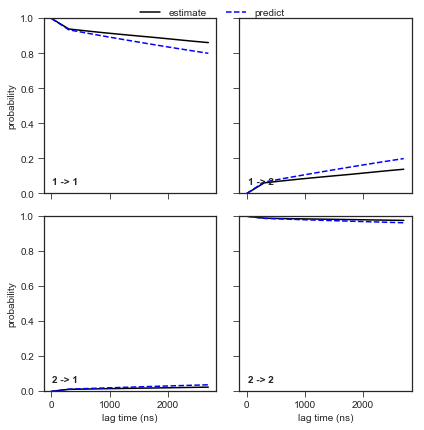

In [43]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag100ns_outto2700ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag100ns_outto2700ns.pdf')

In [ ]:
# lag 200 ns

In [44]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 1000)

In [45]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (300/200)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

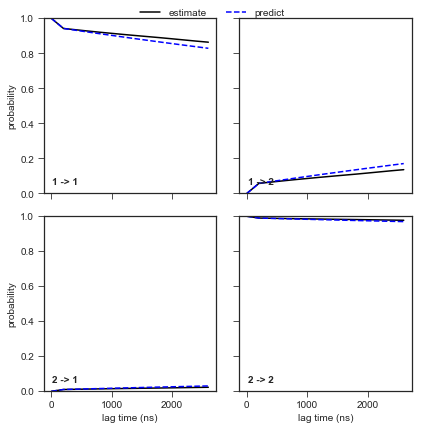

In [46]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag200ns_outto2700ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag200ns_outto2700ns.pdf')

In [47]:
# lag 300 ns

In [48]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 1500)

In [49]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (300/300)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

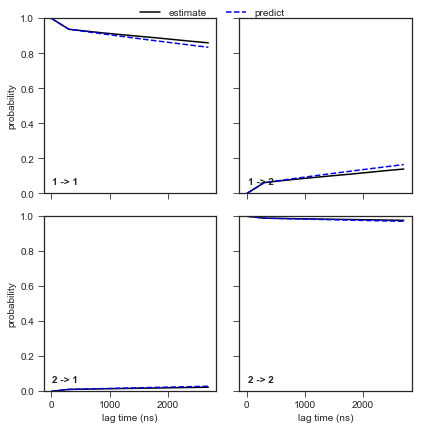

In [50]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('ntl9_cktest_lag300ns_outto2700ns.png', dpi=300)
plt.savefig('ntl9_cktest_lag300ns_outto2700ns.pdf')

In [1]:
#######################
# assign microstates to folded and unfolded based on PCCA macrostates
# let's look at which CK-test is first passed (not requirement for timescale convergence because never converge)

In [2]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [3]:
dtrajs = list(np.load('dtrajs_ntl9_lag10ns.npy'))

In [29]:
# 200 ns

In [30]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 1000)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [31]:
pcca = bmsm.pcca(2)

In [32]:
pcca.coarse_grained_stationary_probability

array([ 0.14987072,  0.85012928])

In [38]:
# hypothesis - 0 is unfolded, 1 is folded - CORRECT

In [33]:
bmsm.metastable_sets

[array([ 1,  2,  3,  5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 19, 20, 21,
        22, 24, 25, 26, 27, 28, 30, 31, 34, 35, 37, 39, 40, 41, 42, 44, 45,
        47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 61, 63, 64, 65, 66, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 79, 81, 82, 83, 84, 85, 86, 88, 89,
        90, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 0,  4, 10, 11, 18, 23, 29, 32, 33, 36, 38, 43, 46, 55, 56, 60, 62,
        67, 77, 78, 80, 87, 91])]

In [19]:
meta_sets = bmsm.metastable_sets

In [36]:
np.save('ntl9_lag200ns_metastable_sets', bmsm.metastable_sets)

In [5]:
meta_sets = np.load('ntl9_lag200ns_metastable_sets.npy')

In [20]:
meta_membs = bmsm.metastable_memberships

In [37]:
np.save('ntl9_lag200ns_metastable_memberships', bmsm.metastable_memberships)

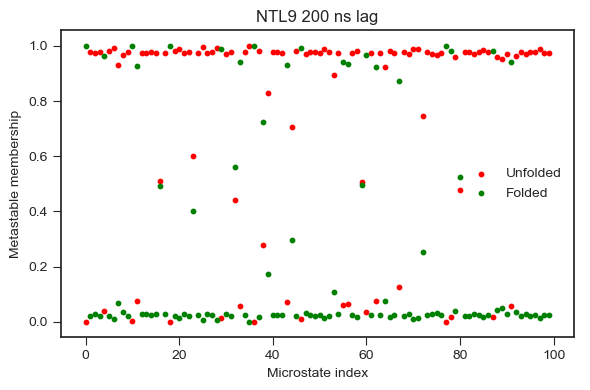

In [39]:
plt.figure(dpi=100)
plt.scatter(range(100), meta_membs[:,0], color='red', s=10, label='Unfolded')
plt.scatter(range(100), meta_membs[:,1], color='green', s=10, label='Folded')
plt.xlabel('Microstate index')
plt.ylabel('Metastable membership')
plt.title('NTL9 200 ns lag')
plt.legend()
plt.tight_layout()
plt.savefig('ntl9_lag200ns_metastable_membs.png', dpi=300)
plt.show()

In [34]:
# meta_membs_diff = []

# for state in bmsm.metastable_memberships:
#     meta_membs_diff.append(np.abs(state[0]-state[1]))
    
# meta_membs_diff_belowp8 = []

# for i in range(len(meta_membs_diff)):
#     if meta_membs_diff[i] < 0.8:
#         meta_membs_diff_belowp8.append(i)

In [35]:
# plt.figure()
# plt.plot(meta_membs_diff)
# plt.xticks(meta_membs_diff_belowp8, rotation=90)
# plt.xlabel('Microstate index')
# plt.ylabel('abs(folded - unfolded) metastable membership')
# plt.title('NTL9')
# plt.axhline(0.8, color='red')
# plt.tight_layout()
# #plt.savefig('villin_lag10ns_metastable_memberships.png', dpi=300)
# plt.show()

In [ ]:
# confirm macrostate assignments by looking at a trajectory

In [96]:
dtrajs_macro = []

for state in dtrajs[0]:
    if state in meta_sets[0]:
        dtrajs_macro.append(0)
    elif state in meta_sets[1]:
        dtrajs_macro.append(1)

In [97]:
len(dtrajs_macro)

5560828

In [98]:
dtrajs[0].shape

(5560828,)

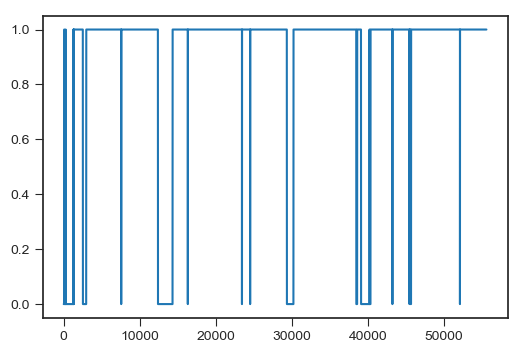

In [99]:
plt.figure(dpi=100)
plt.plot(dtrajs_macro[::100])
plt.show()

In [100]:
# plt.figure(dpi=100)
# plt.scatter(range(len(dtrajs_macro)), dtrajs_macro, s=1)
# plt.show()

In [ ]:
# unfolding

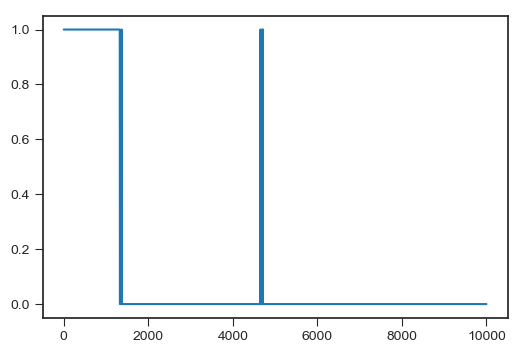

In [68]:
plt.figure(dpi=100)
plt.plot(dtrajs_macro[250000:260000])
plt.show()

In [ ]:
# see shard 25

In [73]:
# folding

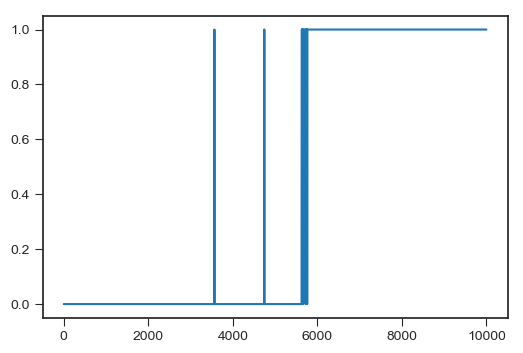

In [83]:
plt.figure(dpi=100)
plt.plot(dtrajs_macro[290000:300000])
plt.show()

In [ ]:
# see shard 29

In [84]:
# these don't make much sense - no proper folded structures...
# let's look at a different trajectory 

In [15]:
dtrajs_macro = []

for state in dtrajs[0]:
    if state in meta_sets[0]:
        dtrajs_macro.append(0)
    elif state in meta_sets[1]:
        dtrajs_macro.append(1)

In [86]:
len(dtrajs_macro)

1945226

In [19]:
dtrajs[2].shape

(1883599,)

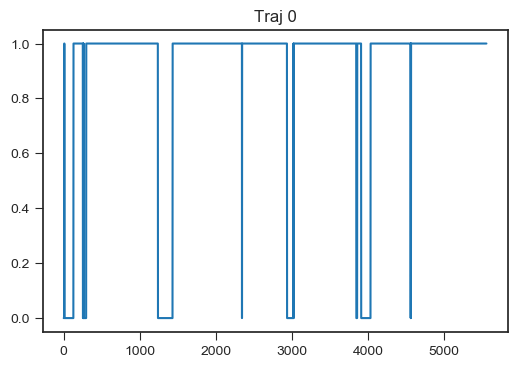

In [16]:
plt.figure(dpi=100)
plt.plot(dtrajs_macro[::1000])
plt.title('Traj 0')
plt.show()

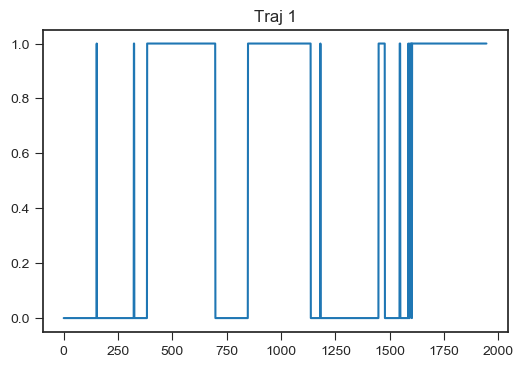

In [9]:
plt.figure(dpi=100)
plt.plot(dtrajs_macro[::1000])
plt.title('Traj 1')
plt.show()

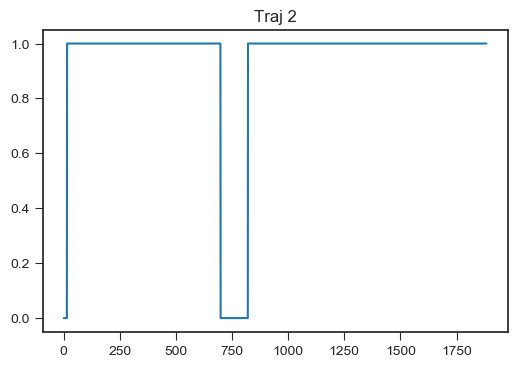

In [13]:
plt.figure(dpi=100)
plt.plot(dtrajs_macro[::1000])
plt.title('Traj 2')
plt.show()

In [91]:
# ok so realized we're not excluding a short trajectory, we're excluding a long one! 

In [92]:
dtrajs[0].shape

(5560828,)

In [93]:
dtrajs[1].shape

(1945226,)

In [94]:
dtrajs[2].shape

(1883599,)

In [17]:
# let's look at some trajectories - traj 2 which is traj3 in dcds - the only one starting from folded

In [18]:
# so that starts folded and goes unfolded pretty quickly... in the first shard - let's look at RMSD of the first shard

In [21]:
import mdtraj as md

In [109]:
ref = md.load('NTL9.pdb')

In [22]:
x = md.load('NTL9-3-protein-000.dcd', top='NTL9.pdb')

In [23]:
x

<mdtraj.Trajectory with 10000 frames, 624 atoms, 78 residues, and unitcells at 0x1a16988eb8>

In [31]:
rmsd_ca = md.rmsd(x, ref, atom_indices=x.top.select('name CA'))

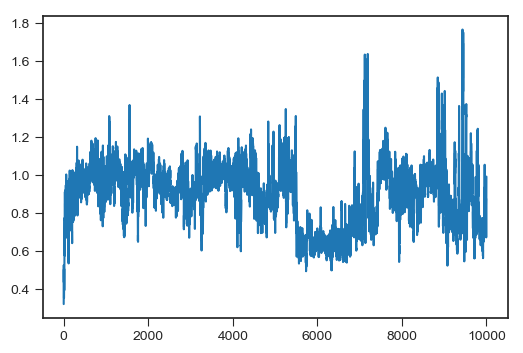

In [32]:
plt.figure(dpi=100)
plt.plot(rmsd_ca)
plt.show()

In [28]:
# ok so yes that's what I see - ok maybe this is just a very short unfolding at the beginning of the trajectory (looks
# like that happens in the SI) - let's take a further shard - 25

In [29]:
# (btw shard corresponds to 2 microseconds)

In [110]:
x = md.load('NTL9-3-protein-025.dcd', top='NTL9.pdb')

In [111]:
rmsd_ca = md.rmsd(x, ref, atom_indices=x.top.select('name CA'))

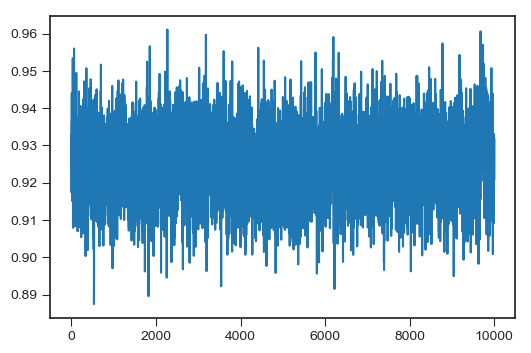

In [112]:
plt.figure(dpi=100)
plt.plot(rmsd_ca)
plt.show()

In [38]:
atom_indices=x.top.select('name CA')

In [39]:
atom_indices

array([  1,   9,  18,  25,  33,  44,  52,  61,  69,  76,  85,  89,  97,
       101, 110, 119, 123, 132, 140, 149, 157, 164, 169, 177, 181, 193,
       198, 206, 214, 225, 233, 244, 253, 262, 266, 274, 279, 287, 296])

In [40]:
# I got some more pdbs from the Ernesto upload - let's see if they have the same topology

In [41]:
ref

<mdtraj.Trajectory with 1 frames, 624 atoms, 78 residues, and unitcells at 0x10adfe0b8>

In [42]:
ref2 = md.load('/Users/rafalpwiewiora/Documents/test.pdb')

In [43]:
ref.top == ref2.top

True

In [44]:
ref3 = md.load('/Users/rafalpwiewiora/Documents/average.pdb')

In [46]:
ref3

<mdtraj.Trajectory with 1 frames, 1244 atoms, 78 residues, without unitcells at 0x10856af98>

In [50]:
ref4 = md.load('/Users/rafalpwiewiora/Documents/average-16-38.pdb')

In [51]:
ref4

<mdtraj.Trajectory with 1 frames, 624 atoms, 39 residues, without unitcells at 0x1a16fc10b8>

In [52]:
# weird...

In [53]:
# ok so inspecting these pdbs manually - yes we have some mess up - let's try to give average-16-38 the positions
# of NTL9

In [71]:
traj = md.load('NTL9-3-protein-025.dcd', top='/Users/rafalpwiewiora/Documents/average-16-38.pdb')

In [73]:
traj

<mdtraj.Trajectory with 10000 frames, 624 atoms, 39 residues, and unitcells at 0x1a15e63438>

In [74]:
traj[0].save('new_top_test.pdb')

In [75]:
# that's a fail

In [76]:
# let's make a pdb of a trajectory - maybe it's PyMOL that's messing things up

In [78]:
x = md.load('NTL9-3-protein-025.dcd', top='NTL9.pdb')

In [79]:
x[:1000].save('NTL9-3-protein-025.pdb')

In [80]:
x

<mdtraj.Trajectory with 10000 frames, 624 atoms, 78 residues, and unitcells at 0x1a15c21ef0>

In [81]:
ref

<mdtraj.Trajectory with 1 frames, 624 atoms, 78 residues, and unitcells at 0x10adfe0b8>

In [82]:
x[0].save('NTL9-3-protein-025_frame0.pdb')

In [ ]:
# OK THIS LOOKS RIGHT NOW - so NTL9-3-protein-025_frame0.pdb is the right topology for 

In [84]:
old = md.load('NTL9.pdb')

In [140]:
new = md.load('NTL9-3-protein-025_frame0.pdb')

In [86]:
old.top == new.top

True

In [88]:
old

<mdtraj.Trajectory with 1 frames, 624 atoms, 78 residues, and unitcells at 0x1a15c0fe10>

In [89]:
new

<mdtraj.Trajectory with 1 frames, 624 atoms, 78 residues, and unitcells at 0x1a15c10dd8>

In [87]:
# ok so this is good - but then why did I get non-sensical RMSDs

In [93]:
old_traj = md.load('NTL9-3-protein-025.dcd', top='NTL9.pdb')

In [92]:
new_traj = md.load('NTL9-3-protein-025.dcd', top='NTL9-3-protein-025_frame0.pdb')

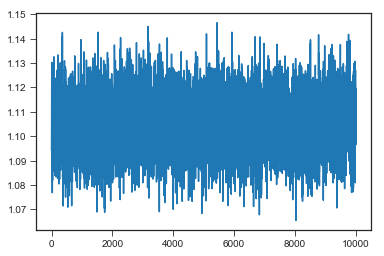

In [138]:
rmsd = md.rmsd(old_traj, old)

plt.figure()
plt.plot(rmsd)
plt.show()

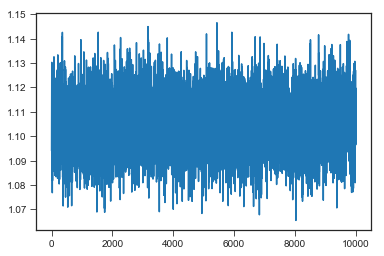

In [139]:
rmsd = md.rmsd(old_traj, new)

plt.figure()
plt.plot(rmsd)
plt.show()

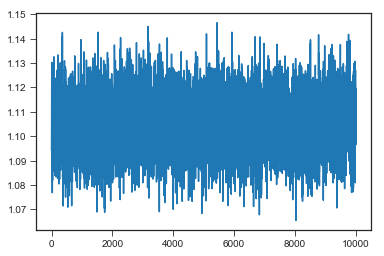

In [117]:
rmsd = md.rmsd(new_traj, old)

plt.figure()
plt.plot(rmsd)
plt.show()

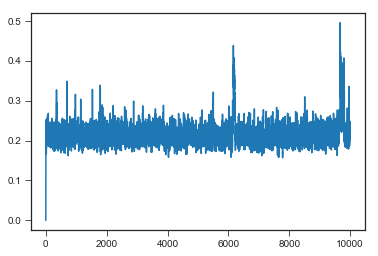

In [118]:
rmsd = md.rmsd(new_traj, new)

plt.figure()
plt.plot(rmsd)
plt.show()

In [119]:
md.rmsd(old, new)

array([ 1.09408426], dtype=float32)

In [121]:
md.rmsd(new, old)

array([ 1.09408426], dtype=float32)

In [122]:
old.save('NTL9_mdtrajtop.pdb')

In [123]:
old2 = md.load('NTL9_mdtrajtop.pdb')

In [124]:
md.rmsd(old2, new)

array([ 1.09408438], dtype=float32)

In [125]:
md.rmsd(new, old2)

array([ 1.09408438], dtype=float32)

In [126]:
new.top == old.top

True

In [127]:
new.top == old2.top

True

In [128]:
# ok so it's not about topology then - it's about positions

In [129]:
# so let's say: there's something about the topology-positions loading in PyMOL that gets the NTL9.pdb structure
# ok but not the trajectory loading - so let's do this:
# 1) check if PyMOL loads ok on the NTL9_mdtrajtop (NTL9.pdb resaved with mdtraj)
# 2) check if I get the same distances from PyEMMA with either topology (NTL9 or NTL9_mdtrajtop)

In [130]:
# suddenly NTL9 works fine in PyMOL...

In [141]:
# check pyEMMA

In [142]:
pyemma

<module 'pyemma' from '/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py'>

In [143]:
feat = pyemma.coordinates.featurizer('NTL9.pdb')

In [144]:
feat.add_residue_mindist()

18-09-18 17:17:26 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


In [147]:
data = pyemma.coordinates.load(['NTL9-0-protein-000.dcd'], feat)

In [148]:
feat2 = pyemma.coordinates.featurizer('NTL9-3-protein-025_frame0.pdb')

In [149]:
feat2.add_residue_mindist()

18-09-18 17:19:25 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[2] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


In [150]:
data2 = pyemma.coordinates.load(['NTL9-0-protein-000.dcd'], feat2)

In [154]:
np.alltrue(data == data2)

True